In [17]:
!pip install -U seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [1]:
import modin.pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import shapiro

import time
import os

In [2]:
os.getcwd()

'/Users/marcin/Documents/KBase/KE/KE_KG/src/embeddings'

In [3]:
df_taxa_orig = pd.read_csv("../../../MGnify/taxonomy_aggregated_full_removed_duplicates_10000.tsv", sep="\t")

In [4]:
cols = [col for col in df_taxa_orig.columns if col not in ['id', 'study_id', 'sample_id', 'biome', 'exptype']]
#df_taxa = df_taxa_orig[df_taxa_orig.columns.difference(['id', 'study_id', 'sample_id', 'biome', 'exp_type'])]
df_taxa = df_taxa_orig[cols]   
df_taxa.shape

(9999, 68509)

In [5]:
df_taxa.columns

Index(['sk__Eukaryota;k__Metazoa;p__Nemertea;c__Anopla;o__Heteronemertea;f__Lineidae;g__Zygeupolia;s__Zygeupolia_rubens',
       'sk__Eukaryota;k__;p__;c__Colpodea;o__Bryophryida',
       'sk__Bacteria;k__;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas;s__Pseudomonas_reactans',
       'sk__Eukaryota;k__;p__;c__Labyrinthulomycetes;o__;f__Thraustochytriaceae;g__Aplanochytrium;s__Aplanochytrium_sp._SEK_603',
       'sk__Bacteria;k__;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Proteinivoraceae;g__Anaerobranca',
       'sk__Bacteria;k__;p__Proteobacteria;c__Alphaproteobacteria;o__Rhodobacterales;f__Rhodobacteraceae;g__Oceanicola;s__Oceanicola_sp._HL-35',
       'sk__Bacteria;k__;p__Firmicutes;c__Bacilli;o__Bacillales;f__Bacillaceae;g__Bacillus;s__Bacillus_sp._1087',
       'sk__Bacteria;k__;p__;c__;o__;f__;g__;s__denitrifying_bacterium_enrichment_culture_clone_NOA_0_E5',
       'sk__Eukaryota;k__Metazoa;p__Nematoda;c__Chromadorea;o__Rhabdi

In [6]:
df_taxa_colsums = df_taxa.sum(axis=0)

distributed.nanny - WARNING - Restarting worker


KeyboardInterrupt: 

In [6]:
#df_taxa_colsums.to_csv("df_taxa_colsums.tsv", sep="\t")
types_dict = {'X': int}
df_taxa_colsums = pd.read_csv("df_taxa_colsums.tsv", names=["X"], dtype=types_dict, sep="\t")
df_taxa_colsums.describe()

KeyboardInterrupt: 

In [17]:
df_taxa_colsums
#df_taxa_colsums[df_taxa_colsums > 0]

df_taxa_colsums_nonzero = pd.DataFrame(df_taxa_colsums[df_taxa_colsums > 0], columns=["X"])
#new_df.iloc[0:100]
df_taxa_colsums_nonzero.shape

(68510, 1)

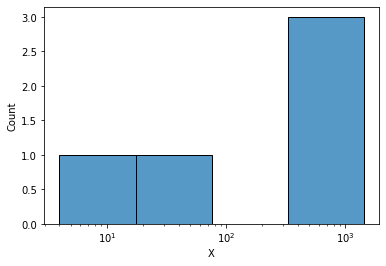

In [18]:
sns.histplot(data=df_taxa_colsums_nonzero.iloc[0:100],x='X', log_scale=True)#, x="MGnify 'Taxa abundance' column sums")#, binwidth=3)

In [23]:
histplot = sns.histplot(data=df_taxa_colsums_nonzero,x='X', log_scale=True)
fig = histplot.get_figure()
fig.savefig("histplot.png")
histplot

KilledWorker: ('parse-58afbcf78521a93de0ae0a63e02c25cd', <Worker 'tcp://127.0.0.1:55415', name: 3, memory: 0, processing: 20>)

In [22]:
shapiro_out = []
start = time.process_time()
last = start
for col in df_taxa.columns:
    #print(col)
    stat, p = shapiro(df_taxa[col])
    shapiro_out.append([stat,p])
    #print("%s %s" % (stat,p))
    curtime = time.process_time() 
    print(curtime - last)
    last = curtime

KeyboardInterrupt: 